In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,breez global hill view,sohna road,0.32,5776.0,2,2,2,19.0,Relatively New,616.0,0,0,0,0,0,0,21
1,flat,signature global synera,sector 81,0.38,9500.0,1,1,2,3.0,Relatively New,444.0,0,0,0,0,0,1,43
2,flat,emaar mgf emerald floors premier,sector 65,2.35,14242.0,3,3,3,3.0,Relatively New,1833.0,1,1,0,0,0,0,124
3,flat,vatika xpressions,sector 88b,1.10,8148.0,2,4,3+,2.0,Under Construction,1350.0,1,0,0,0,0,1,58
4,flat,bptp terra,sector 37d,1.72,7850.0,3,3,3+,10.0,Relatively New,1983.0,0,1,0,0,0,1,31


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sohna road,0.32,2,2,2,19.0,Relatively New,616.0,0,0,0,0,0,0,21
1,flat,sector 81,0.38,1,1,2,3.0,Relatively New,444.0,0,0,0,0,0,1,43
2,flat,sector 65,2.35,3,3,3,3.0,Relatively New,1833.0,1,1,0,0,0,0,124
3,flat,sector 88b,1.10,2,4,3+,2.0,Under Construction,1350.0,1,0,0,0,0,1,58
4,flat,sector 37d,1.72,3,3,3+,10.0,Relatively New,1983.0,0,1,0,0,0,1,31


# luxury score

<AxesSubplot:>

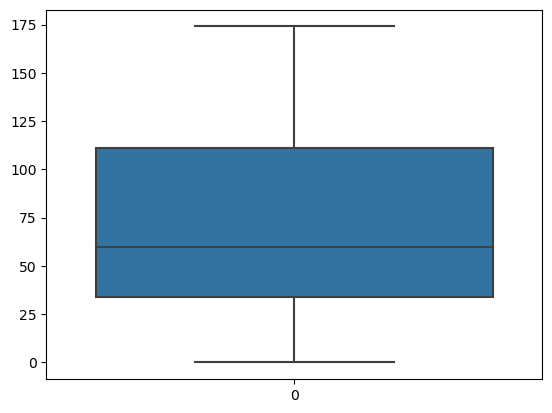

In [10]:
sns.boxplot(df['luxury_score'])

In [11]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [12]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [13]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sohna road,0.32,2,2,2,19.0,Relatively New,616.0,0,0,0,0,0,0,21,Low
1,flat,sector 81,0.38,1,1,2,3.0,Relatively New,444.0,0,0,0,0,0,1,43,Low
2,flat,sector 65,2.35,3,3,3,3.0,Relatively New,1833.0,1,1,0,0,0,0,124,Medium
3,flat,sector 88b,1.10,2,4,3+,2.0,Under Construction,1350.0,1,0,0,0,0,1,58,Medium
4,flat,sector 37d,1.72,3,3,3+,10.0,Relatively New,1983.0,0,1,0,0,0,1,31,Low


# floorNum

<AxesSubplot:>

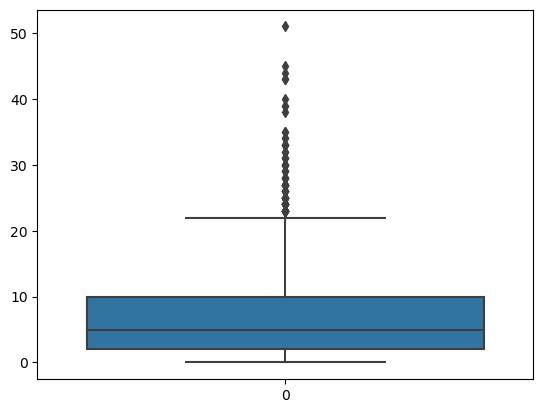

In [14]:
sns.boxplot(df['floorNum'])

In [15]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [16]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sohna road,0.32,2,2,2,19.0,Relatively New,616.0,0,0,0,0,0,0,21,Low,High Floor
1,flat,sector 81,0.38,1,1,2,3.0,Relatively New,444.0,0,0,0,0,0,1,43,Low,Mid Floor
2,flat,sector 65,2.35,3,3,3,3.0,Relatively New,1833.0,1,1,0,0,0,0,124,Medium,Mid Floor
3,flat,sector 88b,1.10,2,4,3+,2.0,Under Construction,1350.0,1,0,0,0,0,1,58,Medium,Low Floor
4,flat,sector 37d,1.72,3,3,3+,10.0,Relatively New,1983.0,0,1,0,0,0,1,31,Low,Mid Floor


In [18]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [19]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sohna road,0.32,2,2,2,Relatively New,616.0,0,0,0,0,0,0,Low,High Floor
1,flat,sector 81,0.38,1,1,2,Relatively New,444.0,0,0,0,0,0,1,Low,Mid Floor
2,flat,sector 65,2.35,3,3,3,Relatively New,1833.0,1,1,0,0,0,0,Medium,Mid Floor
3,flat,sector 88b,1.10,2,4,3+,Under Construction,1350.0,1,0,0,0,0,1,Medium,Low Floor
4,flat,sector 37d,1.72,3,3,3+,Relatively New,1983.0,0,1,0,0,0,1,Low,Mid Floor


In [20]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [21]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,111.0,2,2,2.0,3.0,616.0,0,0,0,0,0,0,1.0,0.0
1,0.0,92.0,1,1,2.0,3.0,444.0,0,0,0,0,0,1,1.0,2.0
2,0.0,73.0,3,3,3.0,3.0,1833.0,1,1,0,0,0,0,2.0,2.0
3,0.0,100.0,2,4,4.0,4.0,1350.0,1,0,0,0,0,1,2.0,1.0
4,0.0,44.0,3,3,4.0,3.0,1983.0,0,1,0,0,0,1,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,82.0,3,3,3.0,3.0,1466.0,0,0,0,0,1,1,2.0,0.0
3550,0.0,8.0,3,4,3.0,3.0,1305.0,1,1,0,0,0,1,1.0,2.0
3551,0.0,82.0,3,3,3.0,0.0,1466.0,1,0,0,0,0,1,2.0,1.0
3552,0.0,89.0,2,2,3.0,4.0,1578.0,0,0,0,0,0,1,2.0,0.0


In [22]:
y_label

0       0.32
1       0.38
2       2.35
3       1.10
4       1.72
        ... 
3549    1.10
3550    1.14
3551    0.98
3552    1.45
3553    1.05
Name: price, Length: 3554, dtype: float64

# Technique 1 - Correlation Analysis

<AxesSubplot:>

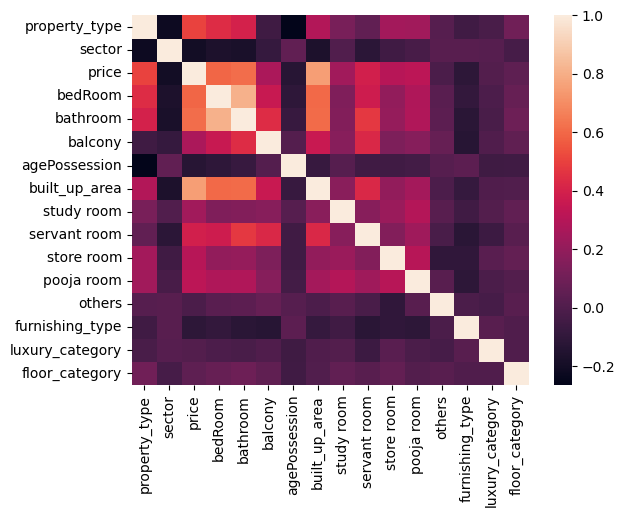

In [23]:
 sns.heatmap(data_label_encoded.corr())

In [24]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.201627
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.132989
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


# Technique 2 - Random Forest Feature Importance

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.644865
1,sector,0.107547
0,property_type,0.101930
2,bedRoom,0.028214
3,bathroom,0.023677
8,servant room,0.019816
5,agePossession,0.014668
4,balcony,0.012532
12,furnishing_type,0.008619
9,store room,0.007781


# Technique 3 - Gradient Boosting Feature importances

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.685602
1,sector,0.100655
0,property_type,0.096453
2,bedRoom,0.038401
3,bathroom,0.035331
8,servant room,0.022441
9,store room,0.009561
5,agePossession,0.004196
7,study room,0.002798
12,furnishing_type,0.002078


# Technique 4 - Permutation Importance

In [27]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.737082
0,property_type,0.186664
1,sector,0.161715
5,agePossession,0.005934
4,balcony,0.004908
2,bedRoom,0.003747
8,servant room,0.002650
7,study room,0.002068
14,floor_category,0.002044
13,luxury_category,0.000593


# Technique 5 - LASSO

In [28]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.509186
0,property_type,0.710966
3,bathroom,0.289924
9,store room,0.206842
8,servant room,0.181355
7,study room,0.179125
10,pooja room,0.085471
13,luxury_category,0.043383
2,bedRoom,0.020554
5,agePossession,-0.000000


# Technique 6 - RFE

In [29]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.652459
0,property_type,0.102234
1,sector,0.102063
2,bedRoom,0.025473
3,bathroom,0.023430
8,servant room,0.020246
5,agePossession,0.014829
4,balcony,0.012077
12,furnishing_type,0.009848
7,study room,0.008021


# Technique 7 - Linear Regression Weights

In [32]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.511641
0,property_type,0.709179
3,bathroom,0.297347
9,store room,0.211337
8,servant room,0.190981
7,study room,0.187908
10,pooja room,0.088819
13,luxury_category,0.053972
2,bedRoom,0.023746
5,agePossession,-0.003469


# Technique 8 - SHAP

In [33]:
!pip install shap

     ------------------------------------ 450.3/450.3 kB 640.5 kB/s eta 0:00:00


In [34]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-1.82518040e-01, -4.27491474e-01, -4.82959051e-02, ...,
         1.03466246e-02, -3.38178080e-03,  1.91345044e-02],
       [-1.61372737e-01, -1.07154580e-01, -4.99583868e-02, ...,
        -1.13893742e-02, -9.46928342e-04, -3.64951085e-03],
       [-3.58376640e-01,  6.26039303e-01, -3.25899240e-02, ...,
         1.61095955e-04,  5.89714449e-03, -5.59871313e-02],
       ...,
       [-2.05601703e-01, -1.99080907e-01, -2.38467550e-02, ...,
        -1.60443640e-02, -1.12276154e-02, -8.23592005e-03],
       [-1.74667622e-01, -1.74426924e-01, -6.28888587e-02, ...,
        -1.02603159e-02,  3.11455266e-03,  2.52896251e-02],
       [-2.88729018e-01, -1.69120589e-01, -2.48568288e-02, ...,
         8.98426602e-03,  5.56233471e-03, -1.65519510e-02]])

In [35]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.241237
0,property_type,0.471917
1,sector,0.388271
3,bathroom,0.113050
8,servant room,0.094349
2,bedRoom,0.059193
4,balcony,0.042887
5,agePossession,0.026134
12,furnishing_type,0.024997
14,floor_category,0.024208


In [36]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [37]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.201627,0.107547,0.100655,0.161715,-0.048090,0.102063,-0.056700,0.388271
bedRoom,0.591289,0.028214,0.038401,0.003747,0.020554,0.025473,0.023746,0.059193
bathroom,0.609777,0.023677,0.035331,-0.000283,0.289924,0.023430,0.297347,0.113050
balcony,0.269637,0.012532,0.001531,0.004908,-0.035516,0.012077,-0.058485,0.042887
agePossession,-0.132989,0.014668,0.004196,0.005934,-0.000000,0.014829,-0.003469,0.026134
built_up_area,0.748574,0.644865,0.685602,0.737082,1.509186,0.652459,1.511641,1.241237
study room,0.242955,0.007672,0.002798,0.002068,0.179125,0.008021,0.187908,0.016675
servant room,0.391930,0.019816,0.022441,0.002650,0.181355,0.020246,0.190981,0.094349
store room,0.305677,0.007781,0.009561,-0.009462,0.206842,0.007662,0.211337,0.016519


In [38]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [39]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.723464
sector             0.142139
bathroom           0.029110
bedRoom            0.026975
servant room       0.023542
agePossession      0.011325
balcony            0.011029
furnishing_type    0.006766
study room         0.006175
floor_category     0.005703
store room         0.005044
luxury_category    0.004915
pooja room         0.002315
others             0.001498
dtype: float64

In [40]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,111.0,2,2,2.0,3.0,616.0,0,0,0,0,0,0,1.0,0.0
1,0.0,92.0,1,1,2.0,3.0,444.0,0,0,0,0,0,1,1.0,2.0
2,0.0,73.0,3,3,3.0,3.0,1833.0,1,1,0,0,0,0,2.0,2.0
3,0.0,100.0,2,4,4.0,4.0,1350.0,1,0,0,0,0,1,2.0,1.0
4,0.0,44.0,3,3,4.0,3.0,1983.0,0,1,0,0,0,1,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,82.0,3,3,3.0,3.0,1466.0,0,0,0,0,1,1,2.0,0.0
3550,0.0,8.0,3,4,3.0,3.0,1305.0,1,1,0,0,0,1,1.0,2.0
3551,0.0,82.0,3,3,3.0,0.0,1466.0,1,0,0,0,0,1,2.0,1.0
3552,0.0,89.0,2,2,3.0,4.0,1578.0,0,0,0,0,0,1,2.0,0.0


In [41]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [42]:
scores.mean()

0.8198062613311491

In [43]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [44]:
scores.mean()

0.8176373380858001

In [45]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [46]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [47]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,111.0,2,2,2.0,3.0,616.0,0,0,0,1.0,0.0,0.32
1,0.0,92.0,1,1,2.0,3.0,444.0,0,0,1,1.0,2.0,0.38
2,0.0,73.0,3,3,3.0,3.0,1833.0,1,0,0,2.0,2.0,2.35
3,0.0,100.0,2,4,4.0,4.0,1350.0,0,0,1,2.0,1.0,1.10
4,0.0,44.0,3,3,4.0,3.0,1983.0,1,0,1,1.0,2.0,1.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,82.0,3,3,3.0,3.0,1466.0,0,0,1,2.0,0.0,1.10
3550,0.0,8.0,3,4,3.0,3.0,1305.0,1,0,1,1.0,2.0,1.14
3551,0.0,82.0,3,3,3.0,0.0,1466.0,0,0,1,2.0,1.0,0.98
3552,0.0,89.0,2,2,3.0,4.0,1578.0,0,0,1,2.0,0.0,1.45
